In [1]:
%run ./01_data_prep.ipynb
%run ./utils.ipynb

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
clf = RandomForestClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_valid)


In [25]:
clf.max_leaf_nodes

In [8]:
from sklearn import metrics
metrics.accuracy_score(y_valid, y_pred)

0.9637357560825377

In [30]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = [
{'n_estimators': [10, 25, 100, 200], 'max_features': [10, 25, 30], 
 'max_depth': [50, None], 'bootstrap': [True, False]}
]
# Cross validating data with 5 folds
dt_gs = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

dt_gs.fit(X_train,y_train)

C:\Users\Hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.9603095  0.96242683 0.96396671 0.96439018 0.95852901 0.96032876
 0.96166652 0.96230172        nan        nan        nan        nan
 0.96017476 0.96227285 0.96392821 0.96429394 0.95877925 0.95998226
 0.96168577 0.96187825        nan        nan        nan        nan
 0.96070409 0.96198412 0.96337963 0.96334113 0.94808669 0.94788458
 0.94823106 0.9481252         nan        nan        nan        nan
 0.96040574 0.96256158 0.96340851 0.96351438 0.94880851 0.94795197
 0.94798083 0.94834655        nan        nan        nan        nan]
  category=UserWarning


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False], 'max_depth': [50, None],
                          'max_features': [10, 25, 30],
                          'n_estimators': [10, 25, 100, 200]}])

In [31]:
# Check score when n = best value according to grid search
dt_gs.best_score_

0.9643901813212346

In [32]:
dt_gs.best_params_

{'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 200}

In [47]:
p = [1, 10, 25, 50, 100]
lst_test =[]
lst_train =[]
for i in p:
    dt = RandomForestClassifier(max_depth = i, n_jobs=-1)
    dt.fit(X_train, y_train)
    z = dt.score(X_valid, y_valid)
    t = dt.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)

In [34]:
import matplotlib.pyplot as plt

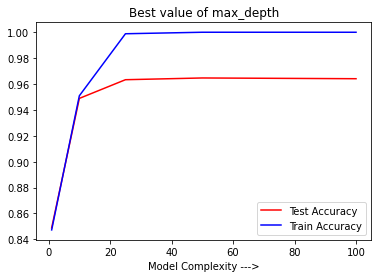

In [48]:
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('Model Complexity --->')
plt.title('Best value of max_depth')
plt.legend()
plt.savefig('RF_complexity_depth.png')

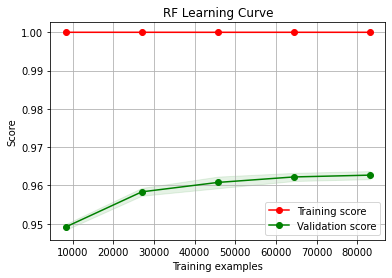

In [53]:
# Using default params
model = RandomForestClassifier()

plot_learning_curve(model, "RF Learning Curve", X_train, y_train, n_jobs=-1)
plt.savefig("learning_curve_RF_big.png")